In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/_laptop_data.csv', encoding='unicode_escape')

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,single,single-href,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,weight,num_processors,processor_brand
0,1715882222-101,https://www.amazon.ca/s?k=microsoft+laptop&i=e...,"Surface Book 2 (2017): 13.5"" Touchscreen Lapto...",https://www.amazon.ca/Microsoft-13-5-Surface-I...,"Microsoft Surface Book 2 (2017): 13.5"" Touchsc...",2287,Microsoft,Surface Book 2,13.5,_3000 x 2000,Intel Core i7,_4.2 GHz core_i7,NVIDIA,8,256 GB SSD,Windows 10 Pro,NaN,4,Intel
1,1715882215-100,https://www.amazon.ca/s?k=microsoft+laptop&i=e...,"Surface Book 3 - 15"" Touch-Screen PixelSense -...",https://www.amazon.ca/Microsoft-Surface-Book-T...,"Microsoft Surface Book 3 - 15"" Touch-Screen Pi...",2999,Microsoft,Surface Book 3,15,_3000 x 2000,Intel Core i7,NaN,NVIDIA,16,256 GB SSD,Windows 10,NaN,4,Intel
2,1715877814-82,https://www.amazon.ca/s?k=dell+laptop&i=electr...,"G15 5530 2023 Gaming Laptop ~ 15.6"" FHD 165Hz ...",https://www.amazon.ca/Dell-i9-13900HX-DDR4-2TB...,"Dell G15 5530 2023 Gaming Laptop ~ 15.6"" FHD 1...",2995,Dell,G15 5530,15.6,_1920 x 1080,Intel Core i9,_2.9 GHz intel_core_i9,NVIDIA,64,2048 GB SSD,Windows 11 Pro,NaN,24,Intel
3,1715877520-1,https://www.amazon.ca/s?k=dell+laptop&i=electr...,"Vostro 7000 7620 Laptop (2022) | 16"" FHD+ | Co...",https://www.amazon.ca/Dell-Vostro-7000-7620-La...,"Dell Vostro 7000 7620 Laptop (2022) | 16"" FHD+...",1999,Dell,Vostro 7620 Laptop,16 Inches,_1920 x 1200,Intel Core i7,_3.5 GHz core_i7,NVIDIA,8,1024 GB SSD,Windows 11 Pro,NaN,14,Intel
4,1715881880-17,https://www.amazon.ca/s?k=microsoft+laptop&i=e...,"Surface Book 2 15""(Intel Core i7, 16GB Ram, 1 ...",https://www.amazon.ca/Microsoft-Surface-Book-I...,"Microsoft Surface Book 2 15""(Intel Core i7, 16...",2999,Microsoft,Surface Book 2,15,_3000 x 2000,Intel Core i7,_4.2 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 10 Pro,NaN,4,Intel


In [4]:
df['manufacturer'].unique()

array(['Microsoft', 'Dell', 'Samsung', 'Lenovo', 'Asus', 'Acer', 'HP',
       'Apple', 'ACEMAGIC', 'LG', 'Ruzava'], dtype=object)

In [5]:
df.shape

(1262, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      1262 non-null   object
 1   web-scraper-start-url  1262 non-null   object
 2   single                 1262 non-null   object
 3   single-href            1262 non-null   object
 4   title                  1262 non-null   object
 5   price                  1262 non-null   object
 6   manufacturer           1262 non-null   object
 7   model_name             1113 non-null   object
 8   screen_size            1262 non-null   object
 9   display_resolution     1262 non-null   object
 10  cpu_model              1262 non-null   object
 11  processor              1209 non-null   object
 12  graphics_copressor     1262 non-null   object
 13  ram                    1262 non-null   int64 
 14  storage                1262 non-null   object
 15  operating_system     

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
single                     0
single-href                0
title                      0
price                      0
manufacturer               0
model_name               149
screen_size                0
display_resolution         0
cpu_model                  0
processor                 53
graphics_copressor         0
ram                        0
storage                    0
operating_system           0
weight                   629
num_processors             0
processor_brand            0
dtype: int64

In [9]:
cleaned_df = df.drop(columns=['web-scraper-order','web-scraper-start-url','single','single-href','weight'])

In [10]:
cleaned_df['ram'] = cleaned_df['ram'].astype('int32')

In [11]:
cleaned_df['price'] = cleaned_df['price'].str.replace(',','', regex=False).astype(float)

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1262 non-null   object 
 1   price               1262 non-null   float64
 2   manufacturer        1262 non-null   object 
 3   model_name          1113 non-null   object 
 4   screen_size         1262 non-null   object 
 5   display_resolution  1262 non-null   object 
 6   cpu_model           1262 non-null   object 
 7   processor           1209 non-null   object 
 8   graphics_copressor  1262 non-null   object 
 9   ram                 1262 non-null   int32  
 10  storage             1262 non-null   object 
 11  operating_system    1262 non-null   object 
 12  num_processors      1262 non-null   int64  
 13  processor_brand     1262 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 133.2+ KB


/Users/shoaib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

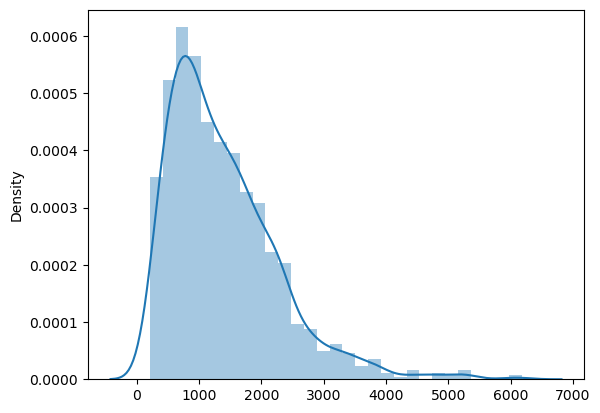

In [13]:
sns.distplot([cleaned_df['price']])

<AxesSubplot:>

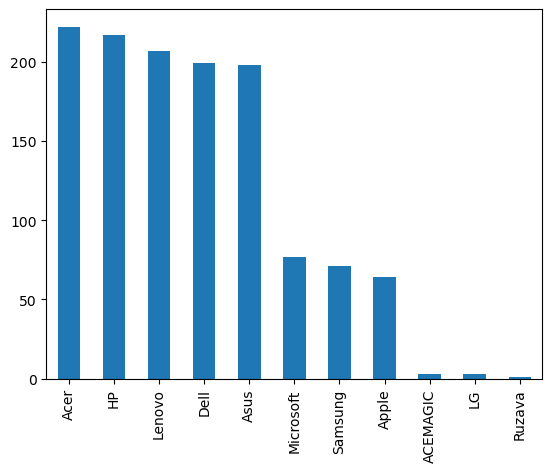

In [14]:
cleaned_df['manufacturer'].value_counts().plot(kind='bar')

In [15]:
cleaned_df['manufacturer'].value_counts()

Acer         222
HP           217
Lenovo       207
Dell         199
Asus         198
Microsoft     77
Samsung       71
Apple         64
ACEMAGIC       3
LG             3
Ruzava         1
Name: manufacturer, dtype: int64

In [16]:
# Remove rows where 'manufacturer' contains 'LG', 'Ruzava' or 'ACEMAGIC'
cleaned_df = cleaned_df[~cleaned_df['manufacturer'].str.contains('LG|Ruzava|ACEMAGIC', case=False)]

In [17]:
cleaned_df['manufacturer'].value_counts()

Acer         222
HP           217
Lenovo       207
Dell         199
Asus         198
Microsoft     77
Samsung       71
Apple         64
Name: manufacturer, dtype: int64

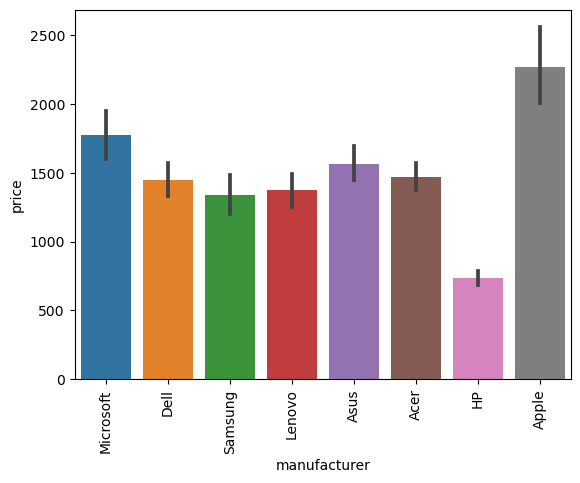

In [18]:
sns.barplot(x=cleaned_df['manufacturer'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
def is_touchable(title):
    keywords = ['touchscreen', 'touch screen', 'touch-screen']
    for keyword in keywords:
        if keyword.lower() in title.lower():
            return 1
    return 0

In [20]:
cleaned_df['touchable'] = cleaned_df['title'].apply(is_touchable)

In [21]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable
32,"Lenovo LOQ 15APH8 2023 Gaming Laptop 15.6"" FHD...",2169.0,Lenovo,LOQ 15APH8,15.6,_1920 x 1080,AMD Ryzen 7,_3.8 GHz amd_ryzen_7,NVIDIA,64,2048 GB SSD,Windows 11 Pro,8,AMD,0
203,"Acer Nitro 5 15.6"" QHD (2560 x 1440) 165Hz Gam...",1949.0,Acer,Nitro,15.6,_2560 x 1440,AMD Ryzen 7,_3.2 GHz ryzen_7,NVIDIA,32,2048 GB SSD,Windows 11 Pro,8,AMD,0
224,"Acer Predator Helios PH315-55-76BU, 15.6"" QHD ...",1137.0,Acer,PH315-55-76BU,15.6,_1920 x 1080,Intel Core i7,_2.3 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 11,1,Intel,0
607,"ASUS Vivobook 14 14"" FHD Lightweight Laptop, I...",879.0,Asus,VivoBook,14,_1920 x 1080 pixel,Intel Core i5,_1.7 GHz core_i5,Intel,40,1024 GB SSD,_Windows 11 Pro,12,_Intel,0
229,"ASUS ROG Strix G17 Gaming Laptop, 17.3"" QHD 24...",2999.0,Asus,ROG Strix,17.3 Inches,_2560 x 1440 pixel,AMD Ryzen 9,_2.5 GHz ryzen_9,NVIDIA,16,1024 GB SSD,_Windows 11 Home,12,_AMD,0
1246,"Lenovo ThinkPad X1 Carbon Gen 11 14"" WUXGA IPS...",2799.0,Lenovo,ThinkPad,14,_1920 x 1200,Intel Core i7,_3.9 GHz core_i7,Intel,32,2048 GB SSD,Windows 11 Pro,10,Intel,0
1249,Lenovo ThinkPad P16v Gen 1 21FC003FUS 16 Mobil...,3326.0,Lenovo,Thinkpad P16v Gen 1,14,_1920x1200,Intel Core i7,_apple_ci7,NVIDIA,32,1024 GB SSD,Windows 11 Pro,1,Intel,0
862,"HP Premium 14"" Stream HD Laptop, Intel Celeron...",349.0,HP,Stream,14,_1366 x 768,Intel Celeron,_1.1 GHz celeron_n,Intel,8,64 GB Emmc,Windows 11 S,4,Intel,0
363,Apple 2023 MacBook Air Laptop with M2 chip: 15...,1599.0,Apple,MacBook Air,15.3 Inches,_2880 x 1864,M2,8,Mac,8,512 GB SSD,Mac OS,8,Apple,0
945,"Lenovo Yoga 7i 2-in-1 14"" 2.2K Touchscreen Lap...",1229.0,Lenovo,Lenovo Yoga,14,_2240 x 1400,Intel Core i5,NaN,Intel,16,1024 GB SSD,Windows 11 Home,10,Intel,1


<AxesSubplot:>

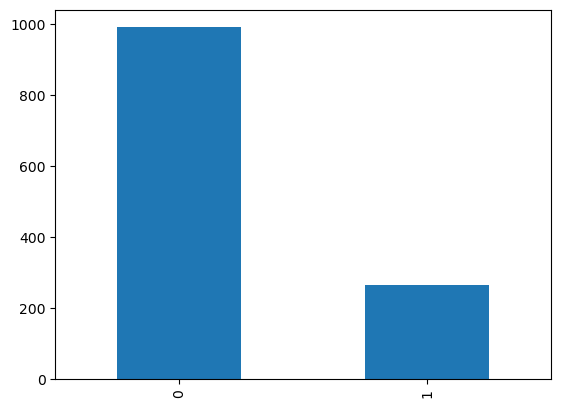

In [22]:
cleaned_df['touchable'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='touchable', ylabel='price'>

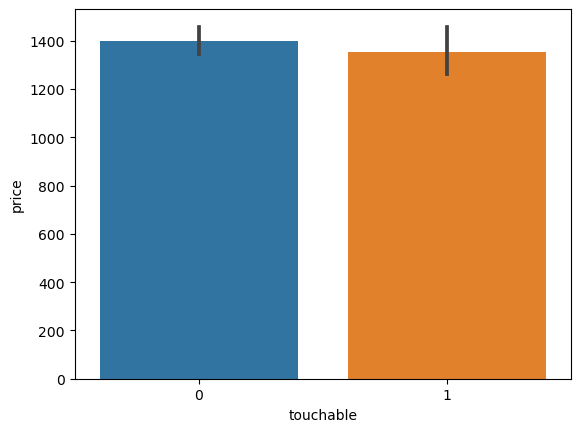

In [23]:
sns.barplot(x=cleaned_df['touchable'], y=cleaned_df['price'])

In [24]:
def is_ips(title):
    if "IPS".lower() in title.lower():
            return 1
    return 0

In [25]:
cleaned_df['ips'] = cleaned_df['title'].apply(is_ips)

In [26]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips
918,"Lenovo Thinkpad E16 Gen 1 16"" WUXGA (1920 x 12...",1592.0,Lenovo,Lenovo Thinkpad E16 Gen 1,16 Inches,_1920 x 1200,Intel Core i7,_3.7 GHz core_i7,Intel,16,512 GB SSD,Windows 11 Pro,1,Intel,1,0
362,Apple 2023 MacBook Air Laptop with M2 chip: 15...,1599.0,Apple,MacBook Air,15.3 Inches,_2880 x 1864,M2,8,Mac,8,512 GB SSD,Mac OS,8,Apple,0,0
51,"Dell G5 15 5511 15.6"" FHD Gaming Laptop - Inte...",846.0,Dell,G5,15.6,_1920 x 1080,Intel Core i5,_2.7 GHz apple_ci5,NVIDIA,8,256 GB SSD,Windows 11 Home,6,Intel,0,0
1000,Dell Inspiron 15 3000 3520 12th Gen Intel i5-1...,699.0,Dell,Inspiron,15.6,_1920 x 1080,Intel Core i5,_1.3 GHz core_i5,Intel,16,512 GB SSD,Windows 11 Home,10,Intel,0,0
979,"Microsoft Surface Laptop 4 (2021): 15"" Touchsc...",2349.0,Microsoft,Surface Laptop,15,_2496 x 1664,Intel Core i7,NaN,Intel,16,512 GB SSD,Windows 11 Home,4,Intel,1,0
213,"Acer Nitro 16 2023 Gaming Laptop 16"" WUXGA 165...",2496.0,Acer,Nitro 16,16 Inches,_1920 x 1200,Intel Core i7,_2.9 GHz core_i7_family,NVIDIA,64,2048 GB SSD,Windows 10 Home,14,Intel,0,0
144,"ASUS Creator Laptop Q530 2023 15.6"" FHD OLED 1...",2239.0,Asus,Creator Laptop Q,15.6,_1920 x 1080,Intel Core i7,_2.9 GHz core_i7_family,NVIDIA,40,4096 GB SSD,_Windows 11 Home,10,_Intel,0,0
1206,"ASUS Vivobook Go 15 Laptop, 15.6Ó FHD Display,...",699.0,Asus,ASUS Vivobook Go 15 Laptop,16 Inches,_1920 x 1080 pixels,AMD Ryzen 5,_2.8 GHz ryzen_5,AMD,16,1024 GB SSD,_Windows 11 Home,14,_AMD,0,0
1123,Dell Inspiron 16 5635 Laptop - AMD Ryzen 7-773...,1018.0,Dell,Dell Inspiron 16 5635 Laptop,16 Inches,_2560 x 1600,AMD Ryzen 7,_4.5 GHz amd_ryzen_7,AMD,16,1024 GB SSD,Windows 11 Home,1,AMD,0,0
713,"HP 15.6'' HD Everyday Slim Laptop, Intel Core ...",599.0,HP,NaN,15.6,_1366 x 768,Intel Core i3,_3 GHz core_i3,Intel,16,512 GB SSD,Windows 11,2,Intel,0,0


<AxesSubplot:>

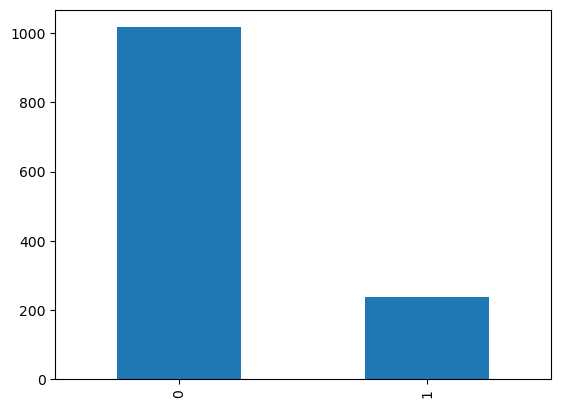

In [27]:
cleaned_df['ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ips', ylabel='price'>

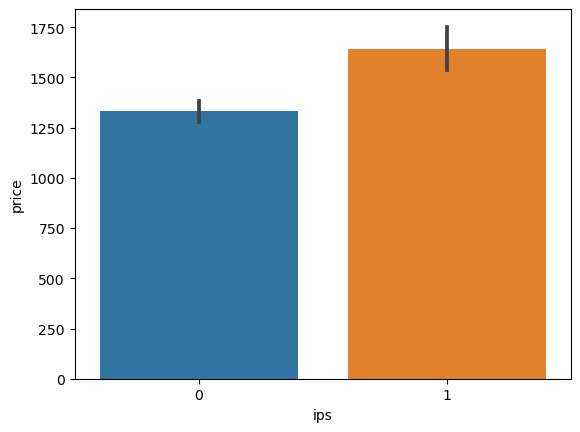

In [28]:
sns.barplot(x=cleaned_df['ips'], y=cleaned_df['price'])

In [29]:
new = cleaned_df['display_resolution'].str.split('x', n=1, expand=True)

In [30]:
cleaned_df['x_res'] = new[0]
cleaned_df['y_res'] = new[1]

In [31]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res
701,2023 Dell Inspiron 15.6Ã FHD Laptop 2-Core In...,687.0,Dell,Inspiron 15,15.6,_1920 x 1080,Intel Core i3,_3 GHz core_i3_family,Intel,8,512 GB SSD,Windows 11 Home,2,Intel,0,0,_1920,1080
409,"Dell Precision 3470 Mobile Workstation 14"" FHD...",849.0,Dell,Dell Precision 3470,14,_1920 x 1080,Intel Core i5,_3.3 GHz core_i5,Intel,16,256 GB SSD,Windows 10 Pro,1,Intel,0,0,_1920,1080
897,"Lenovo IdeaPad 1 14.0"" HD Laptop - Intel Celer...",209.0,Lenovo,Lenovo IdeaPad 1,14,_1366 x 768,Intel Celeron,_1.1 GHz celeron,Intel,4,128 GB Emmc,Windows 11 S,2,Intel,0,0,_1366,768
414,"Microsoft Surface Laptop Go - 12.4"" Touchscree...",924.0,Microsoft,Microsoft Surface Laptop Go,12.3,_1280 x 800,Intel Core i5,NaN,Intel,8,128 GB SSD,Windows 10 S,4,Intel,1,0,_1280,800
913,"Lenovo Thinkpad E14 Gen5 14"" WUXGA Laptop - In...",1499.0,Lenovo,Lenovo Thinkpad E14 Gen 5,14,_1920 x 1200,Intel Core i7,_3.7 GHz core_i7,Intel,16,512 GB SSD,Windows 11 Pro,10,Intel,0,0,_1920,1200
1030,"Microsoft Surface Laptop 4 (2021): 15"" Touchsc...",789.0,Microsoft,Surface Laptop,15,_2496 x 1664,AMD Ryzen 7,_2 GHz amd_ryzen_7,AMD,8,256 GB SSD,Windows 10 Home,8,AMD,1,0,_2496,1664
812,"HP 17.3"" FHD IPS Anti-Glare Laptop, Intel Core...",899.0,HP,NaN,17.3 Inches,_1920 x 1080,Intel Core i3,_1.2 GHz core_i3,Intel,32,1024 GB SSD,Windows 11 Pro,6,Intel,0,1,_1920,1080
24,"Lenovo IdeaPad Gaming 3 15 Laptop, 15.6"" FHD 1...",1429.0,Lenovo,IdeaPad,15.6,_1920 x 1080,AMD Ryzen 5,_3.3 GHz ryzen_5,NVIDIA,32,2048 GB SSD,Windows 11,8,AMD,0,0,_1920,1080
300,"Acer Nitro 5 17 - Laptop - 17.3"" FHD IPS - 144...",1618.0,Acer,Nitro 5 17,17.3 Inches,_1920 x 1080,Intel Core i5,_2.1 GHz core_i5_family,NVIDIA,32,1024 GB SSD,Windows 11 Home,8,Intel,0,1,_1920,1080
292,"Acer Nitro 16 - Laptop - 16"" WUXGA IPS - 165Hz...",1780.0,Acer,Nitro 16,16 Inches,_1920 x 1200,Intel Core i7,_2.3 GHz core_i7_family,NVIDIA,32,1024 GB SSD,Windows 11 Pro,10,Intel,0,1,_1920,1200


In [32]:
cleaned_df['x_res'] = cleaned_df['x_res'].str.replace('_','', regex=False).astype(int)

In [33]:
cleaned_df['y_res'].unique()

array([' 2000', ' 1080', ' 1200', ' 1800', ' 2160', ' 1440', ' 1600',
       ' 1600 pixels', '1080', ' 1200 pixel', ' 1080 pixels',
       ' 1440 pixels', ' 1080 pixel', ' 1824 pixel', ' 1440 pixel',
       ' 1600 pixel', ' 1620 pixel', ' 1920', ' 2400', '1200', '2400',
       ' 1800 pixels', '2160', ' 768', ' 720', ' 1664', ' 1964', ' 1864',
       ' 2234', ' 1504', '1824', ' 1024', ' 1280', ' 800', ' 1200 pixels',
       ' 1824', ' 1400', ' 1620', ' 1800 pixel', ' 768 pixels', ' 1350',
       ' 900'], dtype=object)

In [34]:
cleaned_df['y_res'] = cleaned_df['y_res'].str.replace(r'\D', '', regex=True).astype(int)

In [35]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res
1225,"Acer 2023 Swift Edge Laptop: Ryzen 7 6800U, 16...",1669.0,Acer,Swift Edge,16 Inches,_3840 x 2160,AMD Ryzen 7,_4.7 ryzen_7,AMD,16,1024 GB SSD,Windows 11,1,AMD,0,0,3840,2160
853,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",389.0,HP,Stream,14,_1366 x 768,Intel Celeron,_2.6 GHz celeron_n,Intel,4,64 GB Emmc,Windows 11 S,2,Intel,0,0,1366,768
85,"Acer Nitro 5 Gaming Laptop 15.6"" FHD IPS 144Hz...",1862.0,Acer,AN515,15.6,_1920x1080,Intel Core i7,_2.3 GHz core_i7_family,NVIDIA,32,1024 GB SSD,Windows 11 Home,8,Intel,0,1,1920,1080
165,"Acer Nitro 5 17 - Laptop - 17.3"" FHD IPS - 144...",2239.0,Acer,Nitro 5 17,17.3 Inches,_1920 x 1080,Intel Core i5,_2.1 GHz core_i5_family,NVIDIA,64,4096 GB SSD,Windows 10 Home,8,Intel,0,1,1920,1080
452,"Microsoft Surface Laptop 5 (2022): 13"" Touchsc...",1689.0,Microsoft,Surface Laptop,13.5,_2256 x 1504,Intel Core i5,_1.3 GHz apple_ci5,Intel,8,512 GB SSD,Windows 11 Home,10,Intel,1,0,2256,1504
104,"ASUS Zenbook Pro 17 17.3"" 165Hz WQHD Touchscre...",1989.0,Asus,ZenBook Pro,17.3 Inches,_2560 x 1600 pixels,AMD Ryzen 7,_3.2 GHz ryzen_7,NVIDIA,16,512 GB SSD,_Windows 11 Home,8,_AMD,1,0,2560,1600
440,"Surface Laptop 3 13"" i7/16/512 Cobalt Blue Fab...",1133.0,Microsoft,Surface Laptop 3,13.5,_2256 x 1504,Intel Core i7,_3.9 GHz core_i7_1065g7,Intel,16,512 GB SSD,Windows 10,4,Intel,0,0,2256,1504
1229,"Dell Inspiron 15 3000 Laptop, 15.6"" FHD LED Di...",979.0,Dell,Dell Inspiron 15,15.6,_1920 x 1080,Intel Core i3,_3 GHz core_i3,Intel,32,1024 GB SSD,Windows 11 Pro,6,Intel,0,0,1920,1080
783,"ASUS Vivobook 14 2023 Laptop / 14"" LED-Backlit...",700.0,Asus,Vivobook 14 F415EA,14,_1920 x 1080 pixels,Intel Core i3,_3.2 GHz core_i3_family,Intel,8,1024 GB SSD,_Windows 11 Home,2,_Intel,0,0,1920,1080
789,Dell Inspiron 16 Plus 7640 Laptop - 16.0-inch ...,1399.0,Dell,Dell Inspiron 16 7640 Laptop,16 Inches,_2560 x 1600,Intel Core i7,_3.6 GHz core_i7_family,Intel,16,1024 GB SSD,Windows 11 Home,10,Intel,0,0,2560,1600


In [36]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1261
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1255 non-null   object 
 1   price               1255 non-null   float64
 2   manufacturer        1255 non-null   object 
 3   model_name          1107 non-null   object 
 4   screen_size         1255 non-null   object 
 5   display_resolution  1255 non-null   object 
 6   cpu_model           1255 non-null   object 
 7   processor           1203 non-null   object 
 8   graphics_copressor  1255 non-null   object 
 9   ram                 1255 non-null   int32  
 10  storage             1255 non-null   object 
 11  operating_system    1255 non-null   object 
 12  num_processors      1255 non-null   int64  
 13  processor_brand     1255 non-null   object 
 14  touchable           1255 non-null   int64  
 15  ips                 1255 non-null   int64  
 16  x_res 

In [37]:
cleaned_df.corr()['price']

price             1.000000
ram               0.505469
num_processors    0.596594
touchable        -0.022500
ips               0.139814
x_res             0.620967
y_res             0.637042
Name: price, dtype: float64

In [38]:
cleaned_df['screen_size'].unique()

array(['13.5', '15', '15.6', '16 Inches', '14.4', '17.3 Inches', '14',
       '13.4', '17 Inches', '11.6', '13.6 Inches', '14.2 Inches',
       '15.3 Inches', '16.2 Inches', '13.3', '12.3', '10.5'], dtype=object)

In [39]:
cleaned_df['screen_size'] = cleaned_df['screen_size'].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)

In [40]:
cleaned_df['screen_size'].unique()

array([13.5, 15. , 15.6, 16. , 14.4, 17.3, 14. , 13.4, 17. , 11.6, 13.6,
       14.2, 15.3, 16.2, 13.3, 12.3, 10.5])

In [41]:
cleaned_df['ppi'] = (((cleaned_df['x_res']**2) + (cleaned_df['y_res']**2))**0.5/cleaned_df['screen_size']).astype('float')

In [42]:
cleaned_df.sample()

,title,price,manufacturer,model_name,screen_size,display_resolution,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res,ppi
1175,"Samsung Galaxy Book4 360 Laptop, 15.6"", Intel ...",1599.0,Samsung,Galaxy Book4 360,15.6,_1920 x 1080,Intel Core i5,_5 GHz apple_ci5,Intel,16,256 GB SSD,Windows 11 Home,10,Intel,0,0,1920,1080,141.211998


In [43]:
cleaned_df.drop(columns=['display_resolution'], inplace=True)

In [44]:
cleaned_df

,title,price,manufacturer,model_name,screen_size,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,x_res,y_res,ppi
0,"Microsoft Surface Book 2 (2017): 13.5"" Touchsc...",2287.0,Microsoft,Surface Book 2,13.5,Intel Core i7,_4.2 GHz core_i7,NVIDIA,8,256 GB SSD,Windows 10 Pro,4,Intel,1,0,3000,2000,267.077872
1,"Microsoft Surface Book 3 - 15"" Touch-Screen Pi...",2999.0,Microsoft,Surface Book 3,15.0,Intel Core i7,NaN,NVIDIA,16,256 GB SSD,Windows 10,4,Intel,1,0,3000,2000,240.370085
2,"Dell G15 5530 2023 Gaming Laptop ~ 15.6"" FHD 1...",2995.0,Dell,G15 5530,15.6,Intel Core i9,_2.9 GHz intel_core_i9,NVIDIA,64,2048 GB SSD,Windows 11 Pro,24,Intel,0,0,1920,1080,141.211998
3,"Dell Vostro 7000 7620 Laptop (2022) | 16"" FHD+...",1999.0,Dell,Vostro 7620 Laptop,16.0,Intel Core i7,_3.5 GHz core_i7,NVIDIA,8,1024 GB SSD,Windows 11 Pro,14,Intel,0,0,1920,1200,141.509717
4,"Microsoft Surface Book 2 15""(Intel Core i7, 16...",2999.0,Microsoft,Surface Book 2,15.0,Intel Core i7,_4.2 GHz core_i7,NVIDIA,16,1024 GB SSD,Windows 10 Pro,4,Intel,0,0,3000,2000,240.370085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"Lenovo ThinkPad T14s Gen 3 Business Laptop, 14...",1349.0,Lenovo,ThinkPad,14.0,AMD Ryzen 7,_2.7 GHz ryzen_7,AMD,16,1024 GB SSD,Windows 11 Pro,8,AMD,1,1,1920,1080,157.350512
1258,"Lenovo IdeaPad 15.6"" FHD Laptop, Intel Pentium...",589.0,Lenovo,Lenovo IdeaPad,15.6,Intel Pentium,_1.1 GHz pentium,Intel,20,1024 GB SSD,Windows 11,4,Intel,0,0,1920,1080,141.211998
1259,"Lenovo ThinkPad P1 Gen 6 21FV001UUS 16"" Mobile...",5340.0,Lenovo,ThinkPad P1 Gen 6,16.0,Intel Core i9,_core_i9,NVIDIA,32,1024 GB SSD,Windows 11 Pro,1,Intel,0,0,2560,1600,188.679623
1260,"Lenovo ThinkPad Laptop 2023 New, 14"" FHD IPS T...",1848.0,Lenovo,Lenovo ThinkPad P14s Gen 2 20VX Laptop,14.0,Intel Core i7,_3.1 GHz core_i7_family,NVIDIA,32,1024 GB SSD,Windows 10 Pro,4,Intel,1,1,1920,1080,157.350512


In [45]:
cleaned_df.drop(columns=['screen_size', 'x_res', 'y_res'], inplace=True)

In [46]:
cleaned_df['cpu_model'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5', 'Intel Xeon',
       'AMD Ryzen 7', 'AMD Ryzen 5', 'AMD Ryzen 9', 'Intel Celeron',
       'MediaTek', 'M3', 'M3 ', 'M2  ', 'M2', 'M3 Pro', 'M2 Pro',
       'M3 Max', 'Intel Core i3', 'Intel Atom', 'Intel Celeron D',
       'Intel Pentium', 'Intel Processor N100', 'Intel Core m3',
       'AMD Ryzen 3', 'AMD  ', 'AMD Athlon', 'AMD Ryzen 4', 'AMD'],
      dtype=object)

In [47]:
cleaned_df['cpu_model'] = cleaned_df['cpu_model'].str.strip()

In [48]:
cleaned_df['cpu_model'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5', 'Intel Xeon',
       'AMD Ryzen 7', 'AMD Ryzen 5', 'AMD Ryzen 9', 'Intel Celeron',
       'MediaTek', 'M3', 'M2', 'M3 Pro', 'M2 Pro', 'M3 Max',
       'Intel Core i3', 'Intel Atom', 'Intel Celeron D', 'Intel Pentium',
       'Intel Processor N100', 'Intel Core m3', 'AMD Ryzen 3', 'AMD',
       'AMD Athlon', 'AMD Ryzen 4'], dtype=object)

<AxesSubplot:>

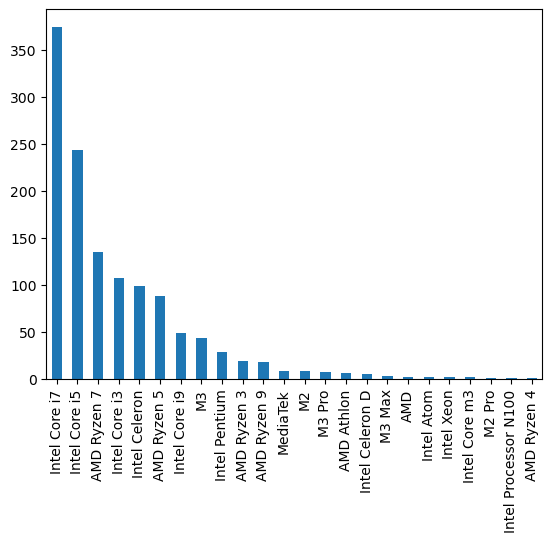

In [49]:
cleaned_df['cpu_model'].value_counts().plot(kind='bar')

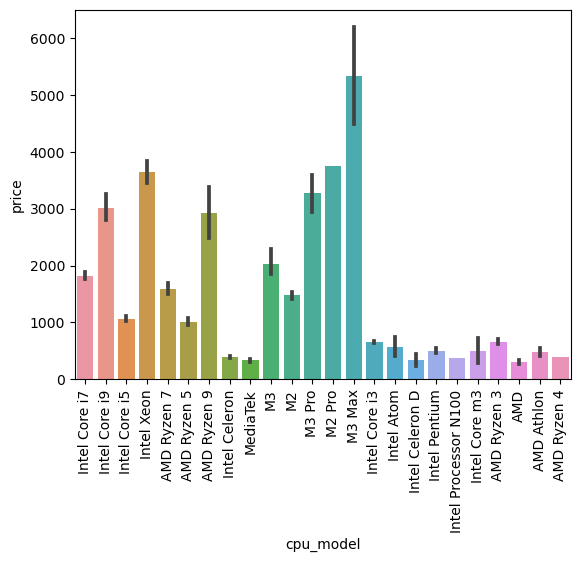

In [50]:
sns.barplot(x=cleaned_df['cpu_model'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
cleaned_df['cpu_model'].value_counts()

Intel Core i7           374
Intel Core i5           243
AMD Ryzen 7             135
Intel Core i3           107
Intel Celeron            99
AMD Ryzen 5              88
Intel Core i9            49
M3                       44
Intel Pentium            29
AMD Ryzen 3              19
AMD Ryzen 9              18
MediaTek                  9
M2                        9
M3 Pro                    7
AMD Athlon                6
Intel Celeron D           5
M3 Max                    3
AMD                       2
Intel Atom                2
Intel Xeon                2
Intel Core m3             2
M2 Pro                    1
Intel Processor N100      1
AMD Ryzen 4               1
Name: cpu_model, dtype: int64

In [52]:
def fetch_processor(text):
    if text == 'Intel Core i9' or text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' or text == 'Intel Celeron':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    elif text == 'AMD Ryzen 9' or text == 'AMD Ryzen 7' or text == 'AMD Ryzen 5':
        return text
    elif text.split()[0] == 'AMD':
        return 'Other AMD Processor'
    elif text == 'M2' or text == 'M2 Pro' or text == 'M3' or text == 'M3 Max' or text == 'M3 Pro':
        return "Mac Processor"
    elif text == 'MediaTek':
        return text
    else:
        return 'Other'

In [53]:
cleaned_df['cpu_name'] = cleaned_df['cpu_model'].apply(fetch_processor)

In [54]:
cleaned_df['cpu_model'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5', 'Intel Xeon',
       'AMD Ryzen 7', 'AMD Ryzen 5', 'AMD Ryzen 9', 'Intel Celeron',
       'MediaTek', 'M3', 'M2', 'M3 Pro', 'M2 Pro', 'M3 Max',
       'Intel Core i3', 'Intel Atom', 'Intel Celeron D', 'Intel Pentium',
       'Intel Processor N100', 'Intel Core m3', 'AMD Ryzen 3', 'AMD',
       'AMD Athlon', 'AMD Ryzen 4'], dtype=object)

In [55]:
cleaned_df['cpu_name'].unique()

array(['Intel Core i7', 'Intel Core i9', 'Intel Core i5',
       'Other Intel Processor', 'AMD Ryzen 7', 'AMD Ryzen 5',
       'AMD Ryzen 9', 'Intel Celeron', 'MediaTek', 'Mac Processor',
       'Intel Core i3', 'Other AMD Processor'], dtype=object)

<AxesSubplot:>

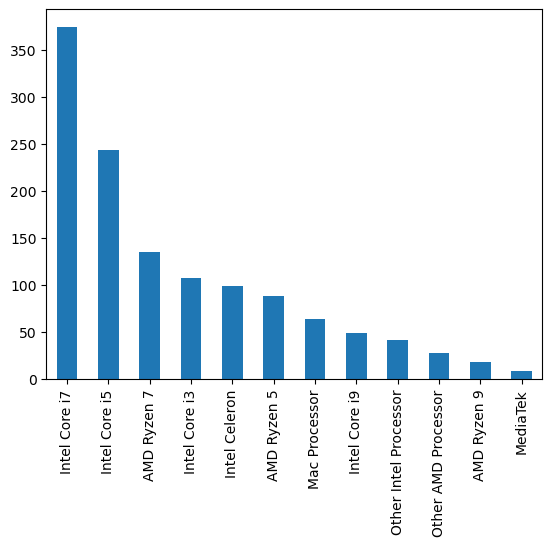

In [56]:
cleaned_df['cpu_name'].value_counts().plot(kind='bar')

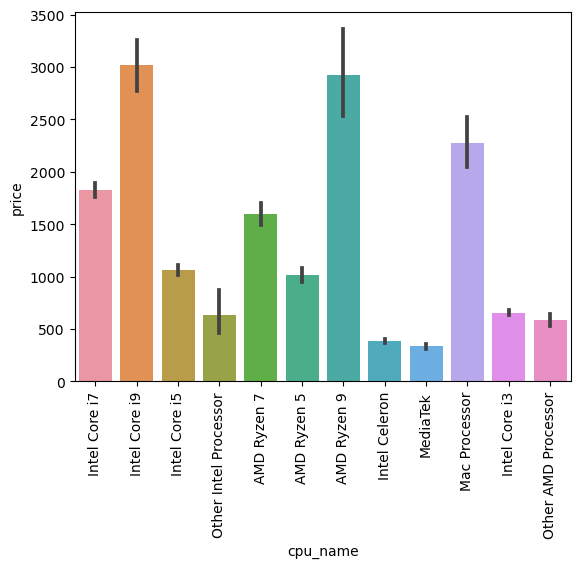

In [57]:
sns.barplot(x=cleaned_df['cpu_name'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
cleaned_df['cpu_name'].value_counts()

Intel Core i7            374
Intel Core i5            243
AMD Ryzen 7              135
Intel Core i3            107
Intel Celeron             99
AMD Ryzen 5               88
Mac Processor             64
Intel Core i9             49
Other Intel Processor     41
Other AMD Processor       28
AMD Ryzen 9               18
MediaTek                   9
Name: cpu_name, dtype: int64

In [59]:
#cleaned_df = cleaned_df[~cleaned_df['cpu_name'].str.contains('MediaTek', case=False)]

In [60]:
#cleaned_df['cpu_name'].value_counts()

In [61]:
# sns.barplot(x=cleaned_df['cpu_name'], y=cleaned_df['price'])
# plt.xticks(rotation='vertical')
# plt.show()

<AxesSubplot:>

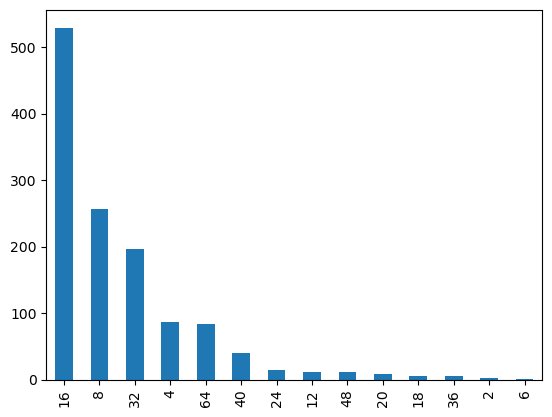

In [62]:
cleaned_df['ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ram', ylabel='price'>

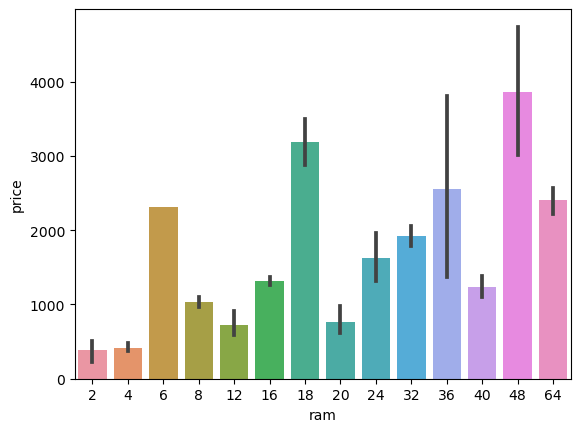

In [63]:
sns.barplot(x=cleaned_df['ram'], y=cleaned_df['price'])

In [64]:
cleaned_df[cleaned_df['ram']==36]

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name
390,Apple 2023 MacBook Pro Laptop M3 Pro chip with...,3799.0,Apple,MacBook Pro,M3 Pro,12,Mac,36,512 GB SSD,Mac OS,12,Apple,0,0,254.023349,Mac Processor
395,Apple 2023 MacBook Pro Laptop M3 Max chip with...,4488.0,Apple,MacBook Pro,M3 Max,14,Mac,36,1024 GB SSD,Mac OS,14,Apple,0,0,253.930343,Mac Processor
396,Apple 2023 MacBook Pro Laptop M3 Max chip with...,4349.0,Apple,MacBook Pro,M3,14,Mac,36,1024 GB SSD,Mac OS,14,Apple,0,0,253.930343,Mac Processor
554,"ASUS Vivobook 15.6Ó FHD Touchscreen Laptop, In...",939.0,Asus,VivoBook,Intel Core i5,_2.4 GHz core_i5,Intel,36,2048 GB SSD,_Windows 11 Pro,4,_Intel,1,0,141.211998,Intel Core i5
601,"ASUS Vivobook 15.6Ó FHD Touchscreen Laptop, In...",879.0,Asus,VivoBook,Intel Core i5,_2.4 GHz core_i5,Intel,36,1024 GB SSD,_Windows 11 Pro,4,_Intel,1,0,141.211998,Intel Core i5
602,"ASUS Vivobook 15.6Ó FHD Touchscreen Laptop, In...",879.0,Asus,VivoBook,Intel Core i5,_2.4 GHz core_i5,Intel,36,1024 GB SSD,_Windows 11 Pro,4,_Intel,1,0,141.211998,Intel Core i5


In [65]:
cleaned_df['storage'].unique()

array(['256 GB SSD', '2048 GB SSD', '1024 GB SSD', '512 GB SSD',
       '4096 GB SSD', '3072 GB SSD', '8192 GB SSD', '128 GB SSD',
       '32 GB Emmc', '64 GB Emmc', '64 GB SSD', '128 GB Emmc',
       '16 GB Emmc', '16 GB SSD'], dtype=object)

<AxesSubplot:>

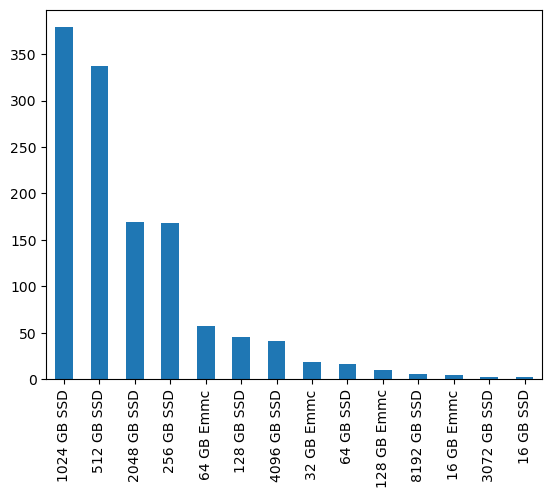

In [66]:
cleaned_df['storage'].value_counts().plot(kind='bar')

In [67]:
cleaned_df['storage'].str.strip().unique()

array(['256 GB SSD', '2048 GB SSD', '1024 GB SSD', '512 GB SSD',
       '4096 GB SSD', '3072 GB SSD', '8192 GB SSD', '128 GB SSD',
       '32 GB Emmc', '64 GB Emmc', '64 GB SSD', '128 GB Emmc',
       '16 GB Emmc', '16 GB SSD'], dtype=object)

In [68]:
def set_storage_range(text):
    if text == '1024 GB SSD' or text == '512 GB SSD' or text == '256 GB SSD' or text == '2048 GB SSD':
        return text
    elif text == '3072 GB SSD' or text == '4096 GB SSD' or text == '8192 GB SSD':
        return '3072 GB SSD or Above'
    elif text == '128 GB SSD' or text == '64 GB SSD' or text == '32 GB SSD' or text == '16 GB SSD':
        return '128 GB SSD or Below'
    elif text == '128 GB Emmc' or text == '64 GB Emmc':
        return '64 GB Emmc or Above'
    elif text == '16 GB Emmc' or text == '32 GB Emmc':
        return '32 GB Emmc or Below'

In [69]:
cleaned_df['storage'].str.contains('Emmc', case= False).value_counts()

False    1165
True       90
Name: storage, dtype: int64

In [70]:
cleaned_df['storage'].str.split()

0        [256, GB, SSD]
1        [256, GB, SSD]
2       [2048, GB, SSD]
3       [1024, GB, SSD]
4       [1024, GB, SSD]
             ...       
1257    [1024, GB, SSD]
1258    [1024, GB, SSD]
1259    [1024, GB, SSD]
1260    [1024, GB, SSD]
1261    [1024, GB, SSD]
Name: storage, Length: 1255, dtype: object

In [71]:
cleaned_df['storage_range_category'] = cleaned_df['storage'].apply(set_storage_range)

In [72]:
cleaned_df['storage_range_category'].value_counts()

1024 GB SSD             379
512 GB SSD              337
2048 GB SSD             169
256 GB SSD              168
64 GB Emmc or Above      67
128 GB SSD or Below      63
3072 GB SSD or Above     49
32 GB Emmc or Below      23
Name: storage_range_category, dtype: int64

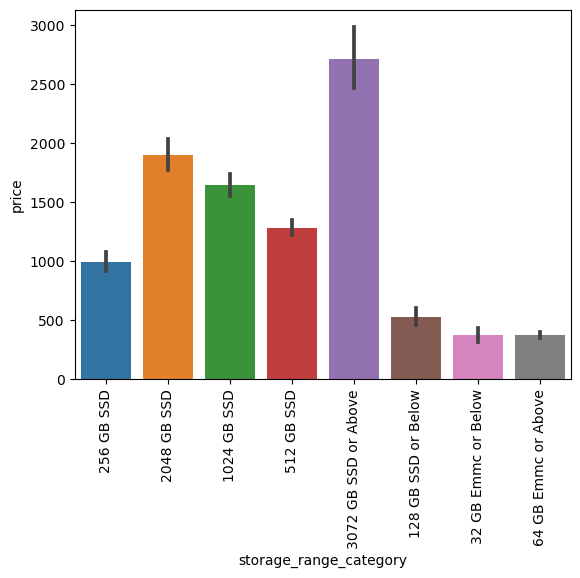

In [73]:
sns.barplot(x=cleaned_df['storage_range_category'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
cleaned_df['storage_range_category'].unique()

array(['256 GB SSD', '2048 GB SSD', '1024 GB SSD', '512 GB SSD',
       '3072 GB SSD or Above', '128 GB SSD or Below',
       '32 GB Emmc or Below', '64 GB Emmc or Above'], dtype=object)

In [75]:
np.array(cleaned_df['storage_range_category'].sample(10))

array(['1024 GB SSD', '1024 GB SSD', '1024 GB SSD', '2048 GB SSD',
       '64 GB Emmc or Above', '1024 GB SSD', '256 GB SSD', '512 GB SSD',
       '512 GB SSD', '512 GB SSD'], dtype=object)

In [76]:
cleaned_df['ssd'] = 0
cleaned_df['emmc'] = 0

In [77]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc
1242,"Lenovo Ideapad Flex 5 14"" WUXGA Touchscreen La...",549.0,Lenovo,Lenovo Ideapad Flex 5,Intel Core i3,NaN,AMD,16,256 GB SSD,Windows 11 S,6,Intel,1,0,161.725391,Intel Core i3,256 GB SSD,0,0
957,"Acer Aspire 5 A515-56-32DK Slim Laptop | 15.6""...",508.0,Acer,A515-56-32DK,Intel Core i3,_4.1 GHz,Intel,4,128 GB SSD,Windows 11 Home,2,Intel,0,1,141.211998,Intel Core i3,128 GB SSD or Below,0,0
303,"Acer Nitro 17 2023 Gaming Laptop 17.3"" FHD IPS...",1996.0,Acer,Nitro 17,AMD Ryzen 7,_2.8 GHz ryzen_7,NVIDIA,32,1024 GB SSD,Windows 11 Home,8,AMD,0,1,127.335675,AMD Ryzen 7,1024 GB SSD,0,0
35,ASUS VivoBook Pro 15X 15.6 2.8K 120Hz Business...,1599.0,Asus,VivoBook Pro,Intel Core i7,_2.3 GHz core_i7,NVIDIA,16,1024 GB SSD,_Windows 11 Home,10,_Intel,0,0,193.517562,Intel Core i7,1024 GB SSD,0,0
66,"Acer Aspire 7 A715-43G-R83Y, 15.6"" FHD 1920x10...",1099.0,Acer,A715-43G-R83Y,AMD Ryzen 7,_2 ryzen_7,NVIDIA,16,1024 GB SSD,Windows 11,1,AMD,0,1,141.211998,AMD Ryzen 7,1024 GB SSD,0,0
46,"LENOVO IdeaPad Gaming 3 15.6"" FHD Laptop, AMD ...",1179.0,Lenovo,IdeaPad,AMD Ryzen 5,_3.3 GHz ryzen_5,NVIDIA,32,1024 GB SSD,Windows 11 Pro,6,AMD,0,0,141.211998,AMD Ryzen 5,1024 GB SSD,0,0
310,"Acer Nitro 16 - Laptop - 16"" WUXGA IPS - 165Hz...",2050.0,Acer,Nitro 16,Intel Core i7,_2.3 GHz core_i7_family,NVIDIA,64,1024 GB SSD,Windows 11 Pro,10,Intel,0,1,141.509717,Intel Core i7,1024 GB SSD,0,0
940,"Lenovo IdeaPad 3i 15.6"" FHD Touchscreen Laptop...",899.0,Lenovo,Lenovo IdeaPad,Intel Core i5,_2.5 GHz core_i5,Intel,40,2048 GB SSD,Windows 11,4,Intel,1,0,141.211998,Intel Core i5,2048 GB SSD,0,0
1169,"Acer Aspire 3 Thin & Light Laptop - 15.6"" Full...",619.0,Acer,Aspire 3,AMD Ryzen 5,_4.3 GHz ryzen_5,AMD,8,512 GB SSD,Windows 11 Home,4,AMD,0,1,141.211998,AMD Ryzen 5,512 GB SSD,0,0
134,"Acer Nitro 5 15.6"" QHD (2560 x 1440) 165Hz Gam...",1699.0,Acer,Nitro,AMD Ryzen 7,_3.2 GHz ryzen_7,NVIDIA,16,512 GB SSD,Windows 11 Pro,8,AMD,0,0,188.282664,AMD Ryzen 7,512 GB SSD,0,0


In [78]:
cleaned_df.loc[cleaned_df['storage_range_category'].str.contains('SSD'), 'ssd'] = cleaned_df['storage_range_category'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
cleaned_df.loc[cleaned_df['storage_range_category'].str.contains('Emmc'), 'emmc'] = cleaned_df['storage_range_category'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [79]:
cleaned_df.sample(10)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc
118,"Microsoft Surface Book 2 15"" (Intel Core i7, 1...",2348.0,Microsoft,Surface Book 2,Intel Core i7,_4.2 GHz core_i7,NVIDIA,16,512 GB SSD,Windows 10 Pro,4,Intel,0,0,240.370085,Intel Core i7,512 GB SSD,512,0
734,"HP 15.6'' HD Everyday Slim Laptop, Intel Core ...",539.0,HP,NaN,Intel Core i3,_3 GHz core_i3,Intel,8,256 GB SSD,Windows 11 S,2,Intel,0,0,100.454670,Intel Core i3,256 GB SSD,256,0
561,Samsung Galaxy Book2 Pro 360 2-in-1 Laptop 202...,1686.0,Samsung,NP930QDEC,Intel Core i7,_2.6 GHz core_i7_family,Intel,16,2048 GB SSD,Windows 11 Pro,12,Intel,0,0,165.632118,Intel Core i7,2048 GB SSD,2048,0
345,Apple 2024 MacBook Air 13-inch Laptop with M3 ...,1699.0,Apple,MacBook Air,M3,8,Mac,8,512 GB SSD,Mac OS,8,Apple,0,0,224.505608,Mac Processor,512 GB SSD,512,0
940,"Lenovo IdeaPad 3i 15.6"" FHD Touchscreen Laptop...",899.0,Lenovo,Lenovo IdeaPad,Intel Core i5,_2.5 GHz core_i5,Intel,40,2048 GB SSD,Windows 11,4,Intel,1,0,141.211998,Intel Core i5,2048 GB SSD,2048,0
1014,"Dell Inspiron 3520 15.6"" FHD (1920 x 1080) Lap...",597.0,Dell,Dell Inspiron 3520,Intel Core i5,_3.3 GHz core_i5,Intel,8,256 GB SSD,Windows 11,10,Intel,0,0,141.211998,Intel Core i5,256 GB SSD,256,0
1021,"Samsung - Notebook 7 Spin 2-in-1 13.3"" Touch-S...",899.0,Samsung,Samsung Notebook 7,Intel Core i5,NaN,Intel,8,256 GB SSD,Windows 10 Home,2,Intel,1,0,165.632118,Intel Core i5,256 GB SSD,256,0
11,"Lenovo ThinkPad T15g Gen 1 15.6"" 4K Touchscree...",3829.0,Lenovo,ThinkPad,Intel Xeon,_2.8 GHz Xeon,NVIDIA,64,4096 GB SSD,Windows 10 Pro,6,Intel,1,0,282.423996,Other Intel Processor,3072 GB SSD or Above,3072,0
336,"Apple 2024 MacBook Air 13.6-inch Laptop, Apple...",1449.0,Apple,MacBook Air,M3,8,Mac,8,256 GB SSD,Mac OS,8,Apple,0,0,224.505608,Mac Processor,256 GB SSD,256,0
927,"LENOVO Ideapad i3 15.6"" FHD IPS Touchscreen La...",619.0,Lenovo,IdeaPad,Intel Core i3,_3 GHz core_i3,Intel,16,512 GB SSD,Windows 11 Home,2,Intel,1,1,141.211998,Intel Core i3,512 GB SSD,512,0


In [80]:
# Analysis for SDD & Emmc
cleaned_df.corr()['price']

price             1.000000
ram               0.505469
num_processors    0.596594
touchable        -0.022500
ips               0.139814
ppi               0.507826
ssd               0.530217
emmc             -0.310854
Name: price, dtype: float64

In [81]:
cleaned_df['memory'] = cleaned_df[['ssd', 'emmc']].sum(axis=1)

In [82]:
cleaned_df.sample(5)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,num_processors,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc,memory
333,"Acer Chromebook 3, 14"" Chromebook, MediaTek MT...",279.0,Acer,Chromebook,MediaTek,_1.6 GHz mediatek_mt8183,MediaTek,4,64 GB Emmc,Chrome OS,8,MediaTek,0,0,104.900341,MediaTek,64 GB Emmc or Above,0,64,64
1192,"Acer Aspire 1 Slim Laptop 15.6"" Full HD Screen...",480.0,Acer,Aspire,Intel Celeron,_1.1 GHz celeron_n,Intel,8,128 GB SSD,Windows 11 Home,2,Intel,0,0,141.211998,Intel Celeron,128 GB SSD or Below,128,0,128
688,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",449.0,HP,Stream,Intel Celeron,_1.1 GHz celeron_n,Intel,16,64 GB SSD,Windows 11,2,Intel,0,0,111.935204,Intel Celeron,128 GB SSD or Below,128,0,128
1024,"HP 15.6"" Laptop with Windows Home in S Mode - ...",472.0,HP,NaN,Intel Core i3,_3.7 GHz core_i3,Intel,8,256 GB SSD,Windows 10 S,4,AMD,0,0,141.211998,Intel Core i3,256 GB SSD,256,0,256
823,"ASUS Chromebook 17.3"" FHD Laptop, Intel Celero...",359.0,Asus,Chromebook,Intel Celeron,_1.1 GHz celeron_n,Intel,4,64 GB Emmc,__Chrome OS,2,_Intel,0,0,127.335675,Intel Celeron,64 GB Emmc or Above,0,64,64


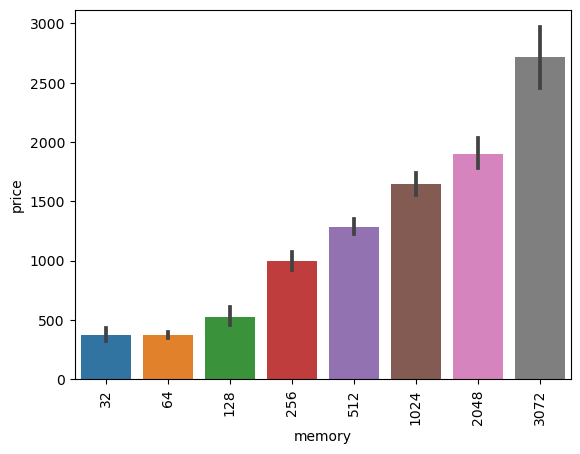

In [83]:
sns.barplot(x=cleaned_df['memory'], y=cleaned_df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
cleaned_df['memory'].value_counts()

1024    379
512     337
2048    169
256     168
64       67
128      63
3072     49
32       23
Name: memory, dtype: int64

In [85]:
cleaned_df['operating_system'].unique()

array(['Windows 10 Pro', 'Windows 10', 'Windows 11 Pro',
       'Windows 11 Home', 'Windows 10 Home', 'Windows 11',
       '_Windows 11 Home', '_Windows 11 Pro', '_Windows 11', 'Windows',
       '_Windows 10 Pro', '_Windows 10 Home', '__Windows 11 Home',
       'Chrome OS', 'Mac OS', 'Windows 10 S', '_Chrome OS',
       'Windows 11 S', '__Chrome OS', '_Windows 10 S', '_Windows 11 S',
       '_Windows 10', 'Windows 10 Professional'], dtype=object)

In [86]:
cleaned_df['operating_system'] = cleaned_df['operating_system'].str.replace('_',"")

In [87]:
cleaned_df['operating_system'].unique()

array(['Windows 10 Pro', 'Windows 10', 'Windows 11 Pro',
       'Windows 11 Home', 'Windows 10 Home', 'Windows 11', 'Windows',
       'Chrome OS', 'Mac OS', 'Windows 10 S', 'Windows 11 S',
       'Windows 10 Professional'], dtype=object)

In [88]:
cleaned_df['operating_system'].value_counts()

Windows 11 Pro             394
Windows 11 Home            369
Windows 11                 114
Windows 10 Home             78
Windows 10 Pro              77
Chrome OS                   68
Mac OS                      64
Windows 10                  40
Windows 11 S                34
Windows 10 S                14
Windows                      2
Windows 10 Professional      1
Name: operating_system, dtype: int64

In [89]:
def operating_system(text):
    if text.split()[0] == 'Windows':
        return 'Windows'
    elif text.split()[0] == 'Mac':
        return 'Mac'
    else:
        return 'Others/Chrome OS'

In [90]:
cleaned_df['os'] = cleaned_df['operating_system'].apply(operating_system)

In [91]:
cleaned_df['os'].value_counts()

Windows             1123
Others/Chrome OS      68
Mac                   64
Name: os, dtype: int64

<AxesSubplot:xlabel='os', ylabel='price'>

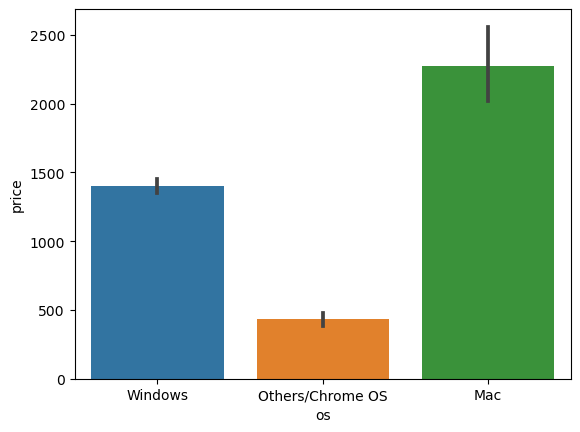

In [92]:
sns.barplot(x=cleaned_df['os'], y=cleaned_df['price'])

In [93]:
cleaned_df['graphics_copressor'].value_counts()

Intel       681
NVIDIA      336
AMD         164
Mac          64
MediaTek      6
Mediatek      3
ARM           1
Name: graphics_copressor, dtype: int64

In [94]:
cleaned_df = cleaned_df[~cleaned_df['graphics_copressor'].str.contains('MediaTek|Mediatek|ARM', case=False)]

In [95]:
cleaned_df['graphics_copressor'].value_counts()

Intel     681
NVIDIA    336
AMD       164
Mac        64
Name: graphics_copressor, dtype: int64

<AxesSubplot:xlabel='graphics_copressor', ylabel='price'>

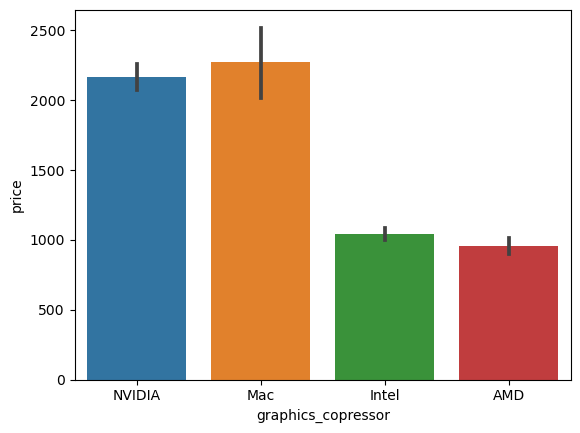

In [96]:
sns.barplot(x=cleaned_df['graphics_copressor'], y=cleaned_df['price'])

<AxesSubplot:xlabel='graphics_copressor', ylabel='price'>

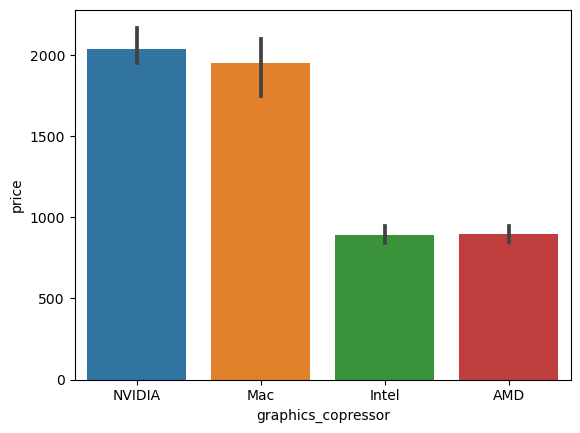

In [97]:
sns.barplot(x=cleaned_df['graphics_copressor'], y=cleaned_df['price'], estimator=np.median)

In [98]:
cleaned_df.sample(5)

,title,price,manufacturer,model_name,cpu_model,processor,graphics_copressor,ram,storage,operating_system,...,processor_brand,touchable,ips,ppi,cpu_name,storage_range_category,ssd,emmc,memory,os
583,"HP 15.6"" Full HD Touchscreen Laptop, Intel Cor...",1449.0,HP,NaN,Intel Core i7,_2.8 GHz core_i7,Intel,64,2048 GB SSD,Windows 11,...,Intel,1,0,141.211998,Intel Core i7,2048 GB SSD,2048,0,2048,Windows
763,"HP 15 inch Laptop, HD Display, Intel Processor...",379.0,HP,HP 15.6 inch Laptop PC 15-fd0000ca,Intel Processor N100,_3.4 GHz none,Intel,4,128 GB SSD,Windows 11 Home,...,Intel,0,0,100.454670,Other Intel Processor,128 GB SSD or Below,128,0,128,Windows
543,Acer Aspire 5 A515 Laptop 2023 15.6Ã FHD 1920...,2023.0,Acer,Aspire 5 A515,Intel Core i7,_2.8 GHz core_i7_family,Intel,32,4096 GB SSD,Windows 10 Home,...,Intel,0,0,141.211998,Intel Core i7,3072 GB SSD or Above,3072,0,3072,Windows
611,Samsung Galaxy Book2 Pro 360 2-in-1 Laptop 202...,1456.0,Samsung,NP930QDEC,Intel Core i7,_2.6 GHz core_i7_family,Intel,16,1024 GB SSD,Windows 11 Home,...,Intel,0,0,165.632118,Intel Core i7,1024 GB SSD,1024,0,1024,Windows
717,"HP 15.6"" HD Touchscreen Laptop, Intel Core i3-...",679.0,HP,NaN,Intel Core i3,_1.2 GHz core_i3,Intel,16,512 GB SSD,Windows 11,...,Intel,1,0,100.454670,Intel Core i3,512 GB SSD,512,0,512,Windows


In [99]:
cleaned_df['num_processors'].unique()

array([ 4, 24, 14, 16,  8,  6,  1, 10, 12, 11,  2, 20])

In [100]:
cleaned_df['num_processors'].value_counts()

4     251
8     248
10    150
2     148
6     123
14     99
1      93
12     87
24     26
16     17
11      2
20      1
Name: num_processors, dtype: int64

<AxesSubplot:xlabel='num_processors', ylabel='price'>

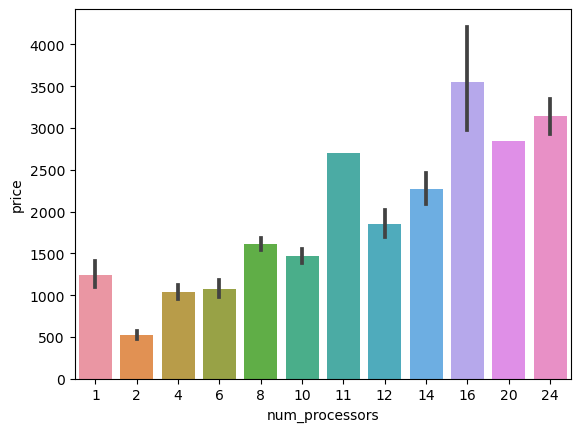

In [101]:
sns.barplot(x=cleaned_df['num_processors'], y=cleaned_df['price'])

In [102]:
cleaned_df = cleaned_df[~cleaned_df['num_processors'].isin([11,20])]


In [103]:
cleaned_df['num_processors'].unique()

array([ 4, 24, 14, 16,  8,  6,  1, 10, 12,  2])

<AxesSubplot:xlabel='num_processors', ylabel='price'>

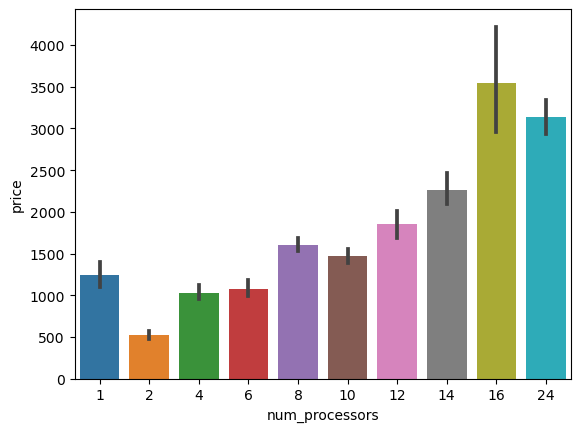

In [104]:
sns.barplot(x=cleaned_df['num_processors'], y=cleaned_df['price'])

## Dropping Extra Columns

In [105]:
cleaned_df.drop(columns=["title", "model_name", "storage","processor_brand", "operating_system", "model_name", "cpu_model", "ssd", "emmc", "storage_range_category", "processor"], inplace=True)


In [106]:
cleaned_df.sample(5)

,price,manufacturer,graphics_copressor,ram,num_processors,touchable,ips,ppi,cpu_name,memory,os
1214,1308.0,Dell,Intel,16,14,0,1,188.679623,Intel Core i7,1024,Windows
722,739.0,Dell,Intel,24,8,1,0,141.211998,Intel Core i5,512,Windows
1156,1269.0,Lenovo,AMD,16,8,1,1,157.350512,AMD Ryzen 7,512,Windows
1185,1049.0,Dell,Intel,32,2,0,0,141.211998,Intel Core i3,2048,Windows
1010,579.0,Dell,AMD,32,1,0,0,141.211998,AMD Ryzen 5,512,Windows


In [107]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1261
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1242 non-null   float64
 1   manufacturer        1242 non-null   object 
 2   graphics_copressor  1242 non-null   object 
 3   ram                 1242 non-null   int32  
 4   num_processors      1242 non-null   int64  
 5   touchable           1242 non-null   int64  
 6   ips                 1242 non-null   int64  
 7   ppi                 1242 non-null   float64
 8   cpu_name            1242 non-null   object 
 9   memory              1242 non-null   int64  
 10  os                  1242 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 111.6+ KB


In [108]:
cleaned_df.duplicated().sum()

137

In [109]:
cleaned_df.isnull().sum()

price                 0
manufacturer          0
graphics_copressor    0
ram                   0
num_processors        0
touchable             0
ips                   0
ppi                   0
cpu_name              0
memory                0
os                    0
dtype: int64

In [110]:
laptop_df = cleaned_df.drop_duplicates()

In [111]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 0 to 1261
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1105 non-null   float64
 1   manufacturer        1105 non-null   object 
 2   graphics_copressor  1105 non-null   object 
 3   ram                 1105 non-null   int32  
 4   num_processors      1105 non-null   int64  
 5   touchable           1105 non-null   int64  
 6   ips                 1105 non-null   int64  
 7   ppi                 1105 non-null   float64
 8   cpu_name            1105 non-null   object 
 9   memory              1105 non-null   int64  
 10  os                  1105 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 99.3+ KB


In [112]:
laptop_df

,price,manufacturer,graphics_copressor,ram,num_processors,touchable,ips,ppi,cpu_name,memory,os
0,2287.0,Microsoft,NVIDIA,8,4,1,0,267.077872,Intel Core i7,256,Windows
1,2999.0,Microsoft,NVIDIA,16,4,1,0,240.370085,Intel Core i7,256,Windows
2,2995.0,Dell,NVIDIA,64,24,0,0,141.211998,Intel Core i9,2048,Windows
3,1999.0,Dell,NVIDIA,8,14,0,0,141.509717,Intel Core i7,1024,Windows
4,2999.0,Microsoft,NVIDIA,16,4,0,0,240.370085,Intel Core i7,1024,Windows
...,...,...,...,...,...,...,...,...,...,...,...
1257,1349.0,Lenovo,AMD,16,8,1,1,157.350512,AMD Ryzen 7,1024,Windows
1258,589.0,Lenovo,Intel,20,4,0,0,141.211998,Other Intel Processor,1024,Windows
1259,5340.0,Lenovo,NVIDIA,32,1,0,0,188.679623,Intel Core i9,1024,Windows
1260,1848.0,Lenovo,NVIDIA,32,4,1,1,157.350512,Intel Core i7,1024,Windows


In [113]:
laptop_df.corr()['price']

price             1.000000
ram               0.521539
num_processors    0.599387
touchable        -0.010926
ips               0.149676
ppi               0.505140
memory            0.534030
Name: price, dtype: float64

<AxesSubplot:>

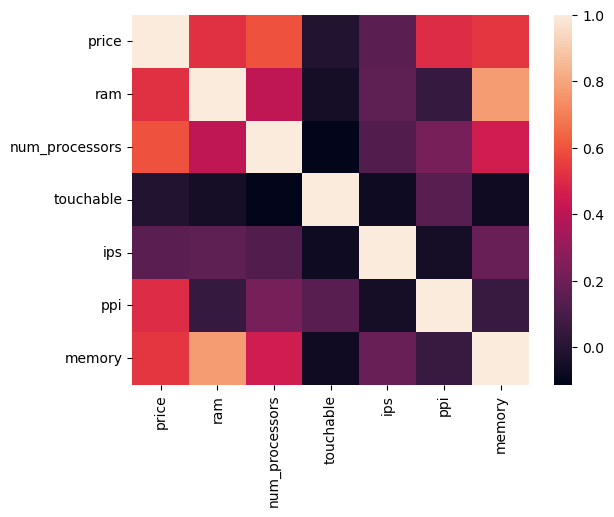

In [114]:
sns.heatmap(laptop_df.corr())

/Users/shoaib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

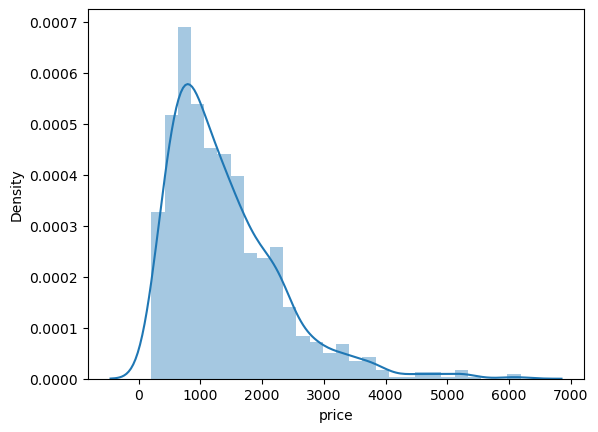

In [115]:
sns.distplot(laptop_df['price'])

/Users/shoaib/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

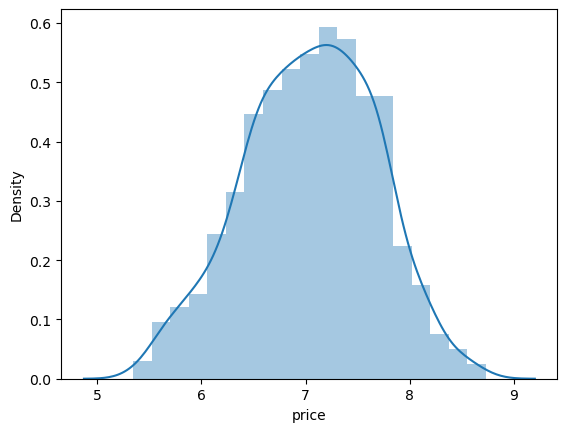

In [116]:
sns.distplot(np.log(laptop_df['price']))

In [117]:
laptop_df.to_csv('data/laptop_df.csv')